In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [2]:
N = 100000

In [3]:
fs, tom_puro = wavfile.read('Tom-puro.wav')

tom_puro = tom_puro[:N][:,0] # Limitando o número de amostras # Selecionando apenas um canal de áudio

ipd.Audio(tom_puro,rate=fs)

In [4]:
fs, distorcido = wavfile.read('Distorcido.wav')

distorcido = distorcido[:N][:,0] # Limitando o número de amostras # Selecionando apenas um canal de áudio

ipd.Audio(distorcido, rate=fs)

In [5]:
fs = 1200
length = 1
t = np.arange(0, length, 1 / fs) 
fm = 60 # frequência fundamental do sinal
N = int(fs/fm) # um período
senoide = np.sin(2 * np.pi * t * fm)

In [6]:
def fft(arr):
    return {
        'abs': np.abs(np.fft.fft(arr)),
        'phase': np.angle(np.fft.fft(arr), deg=True),
    }

In [7]:
senoide_fft = fft(senoide)

In [8]:
square_half_block = np.append(np.ones(int(fs / (2 * fm))), np.zeros(int(fs / (2 * fm))))
square_half = np.tile(square_half_block, int(length * fm))

In [9]:
square_half_fft = fft(square_half)

In [10]:
ret_half = square_half * senoide
ret_half_fft = fft(ret_half)

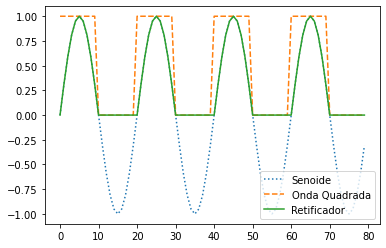

In [41]:
plt.plot(senoide[:4*N], linestyle=':', label='Senoide')
plt.plot(square_half[:4*N], linestyle='--', label='Onda Quadrada')
plt.plot(ret_half[:4*N], label='Retificador')
plt.legend(loc=4)

In [12]:
def espectro_anotado(fft_abs, fft_phase, axs, thr=.1):
    ticks = []
    for i, j in enumerate(fft_abs[:fft_abs.size//2]):
        if j > thr:
            axs[0].annotate(f'{round(j)}', (i - 10, j + 5))
            ticks.append(i)
    axs[0].set_xticks(ticks)
    axs[0].plot(fft_abs[:fft_abs.size//2])
    axs[1].plot(fft_phase[:fft_abs.size//2])

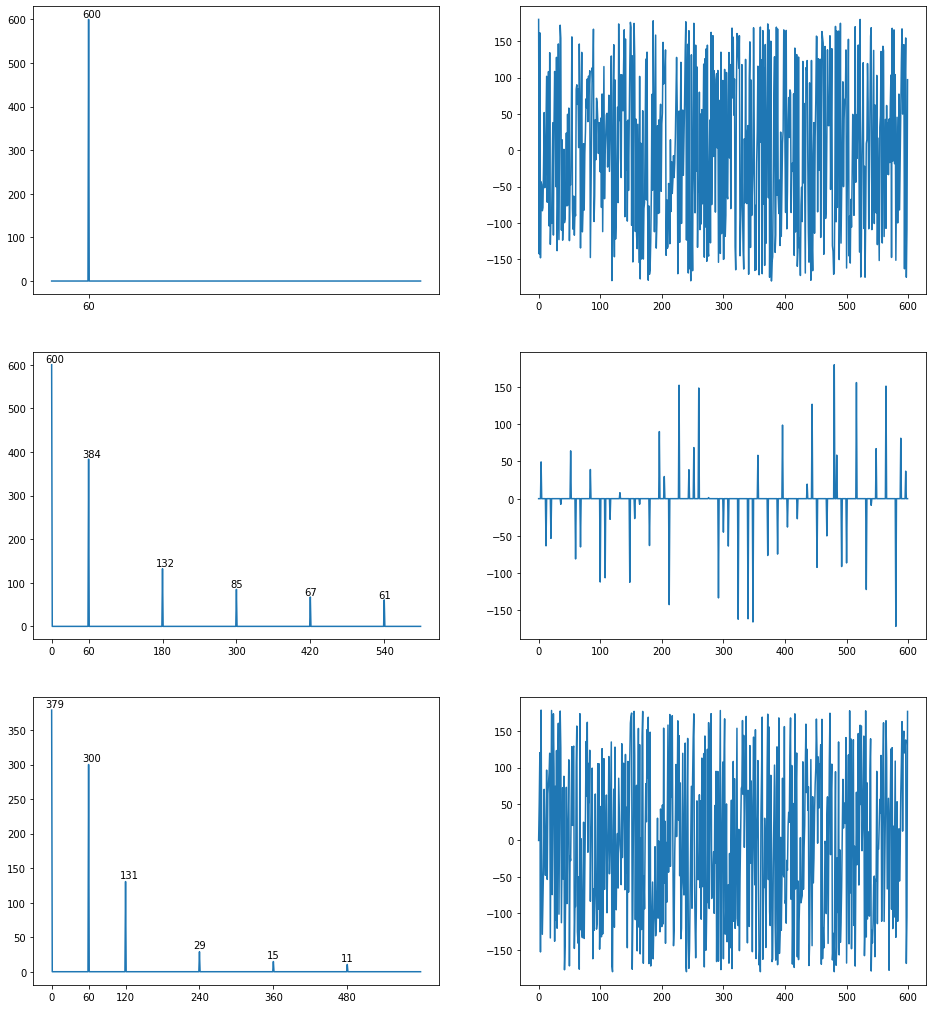

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
espectro_anotado(senoide_fft['abs'], senoide_fft['phase'], axs[0])
espectro_anotado(square_half_fft['abs'], square_half_fft['phase'], axs[1])
espectro_anotado(ret_half_fft['abs'], ret_half_fft['phase'], axs[2])
plt.show()

In [14]:
square_full_block = np.append(np.ones(int(fs / (2 * fm))), -np.ones(int(fs / (2 * fm))))
square_full = np.tile(square_full_block, int(length * fm))

In [15]:
square_full_fft = fft(square_full)

In [16]:
ret_full = np.multiply(senoide, square_full)
ret_full_fft = fft(ret_full)

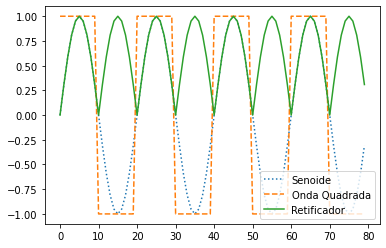

In [42]:
plt.plot(senoide[:4*N], linestyle=':', label='Senoide')
plt.plot(square_full[:4*N], linestyle='--', label='Onda Quadrada')
plt.plot(ret_full[:4*N], label='Retificador')
plt.legend(loc=4)

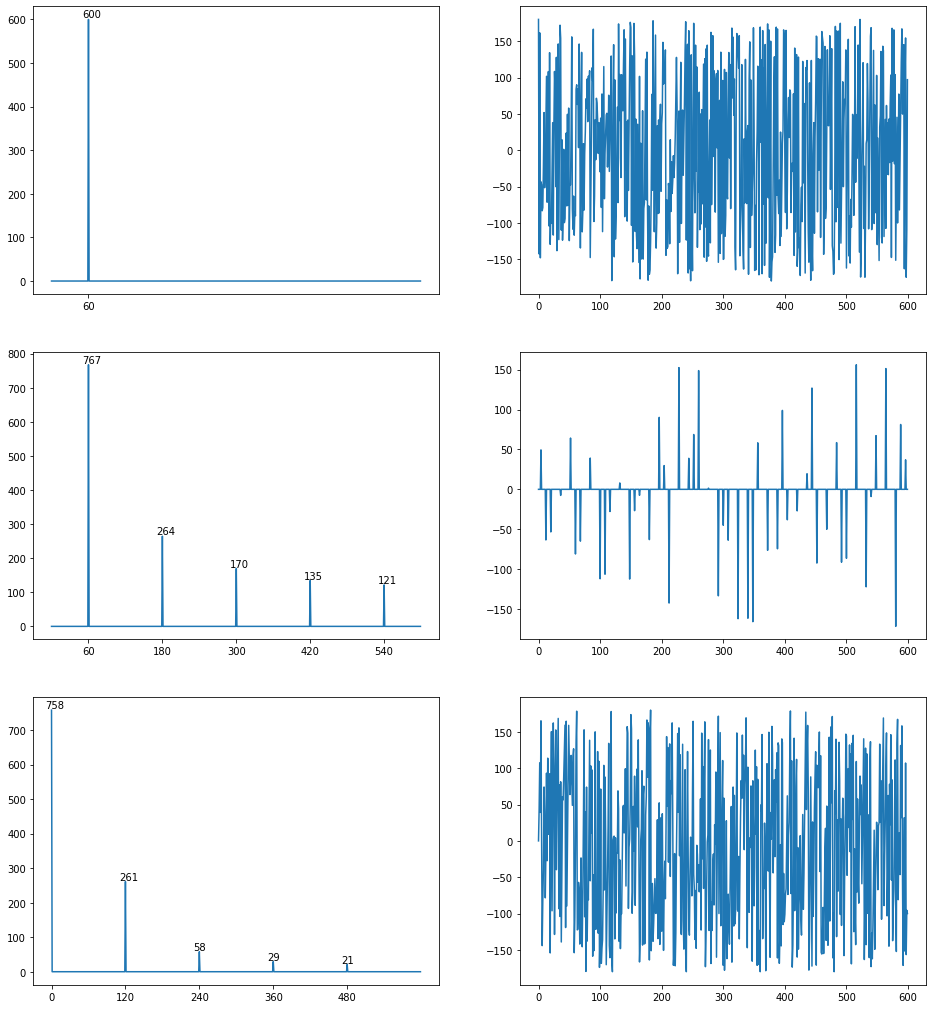

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
espectro_anotado(senoide_fft['abs'], senoide_fft['phase'], axs[0])
espectro_anotado(square_full_fft['abs'], square_full_fft['phase'], axs[1])
espectro_anotado(ret_full_fft['abs'], ret_full_fft['phase'], axs[2])
plt.show()

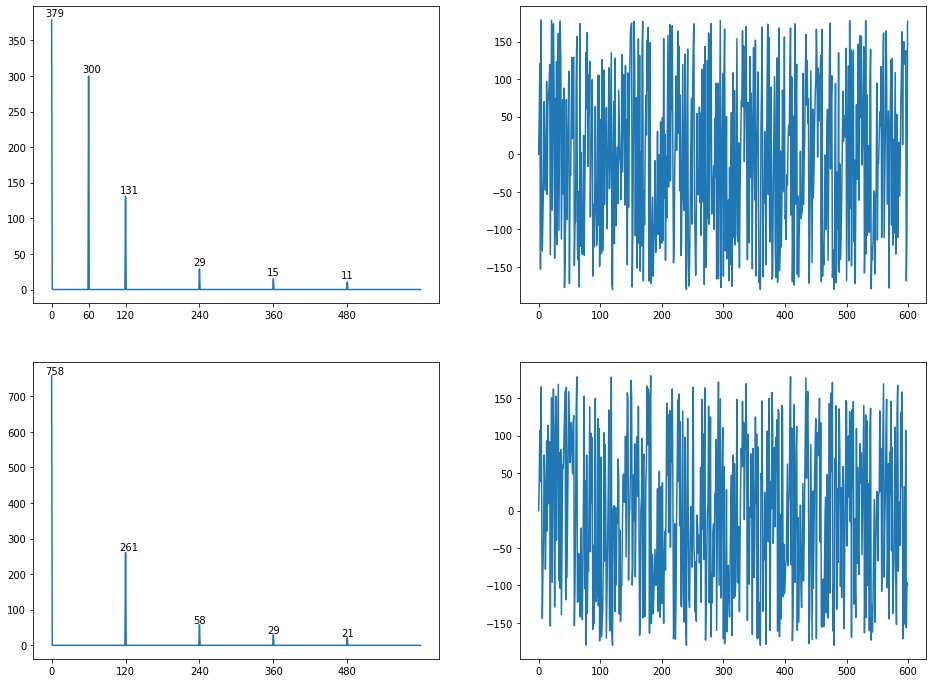

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
espectro_anotado(ret_half_fft['abs'], ret_half_fft['phase'], axs[0])
espectro_anotado(ret_full_fft['abs'], ret_full_fft['phase'], axs[1])
plt.show()

In [20]:
square_tir_block = np.append(np.zeros(int(fs / (4 * fm))), np.ones(int(fs / (4 * fm))))
square_tir_block = np.append(square_tir_block, -square_tir_block)
square_tir = np.tile(square_tir_block, int(length * fm))
square_tir_fft = fft(square_tir)

In [21]:
ret_tir = np.multiply(senoide, square_tir)
ret_tir_fft = fft(ret_tir)

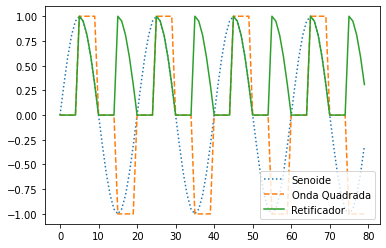

In [43]:
plt.plot(senoide[:4*N], linestyle=':', label='Senoide')
plt.plot(square_tir[:4*N], linestyle='--', label='Onda Quadrada')
plt.plot(ret_tir[:4*N], label='Retificador')
plt.legend(loc=4)

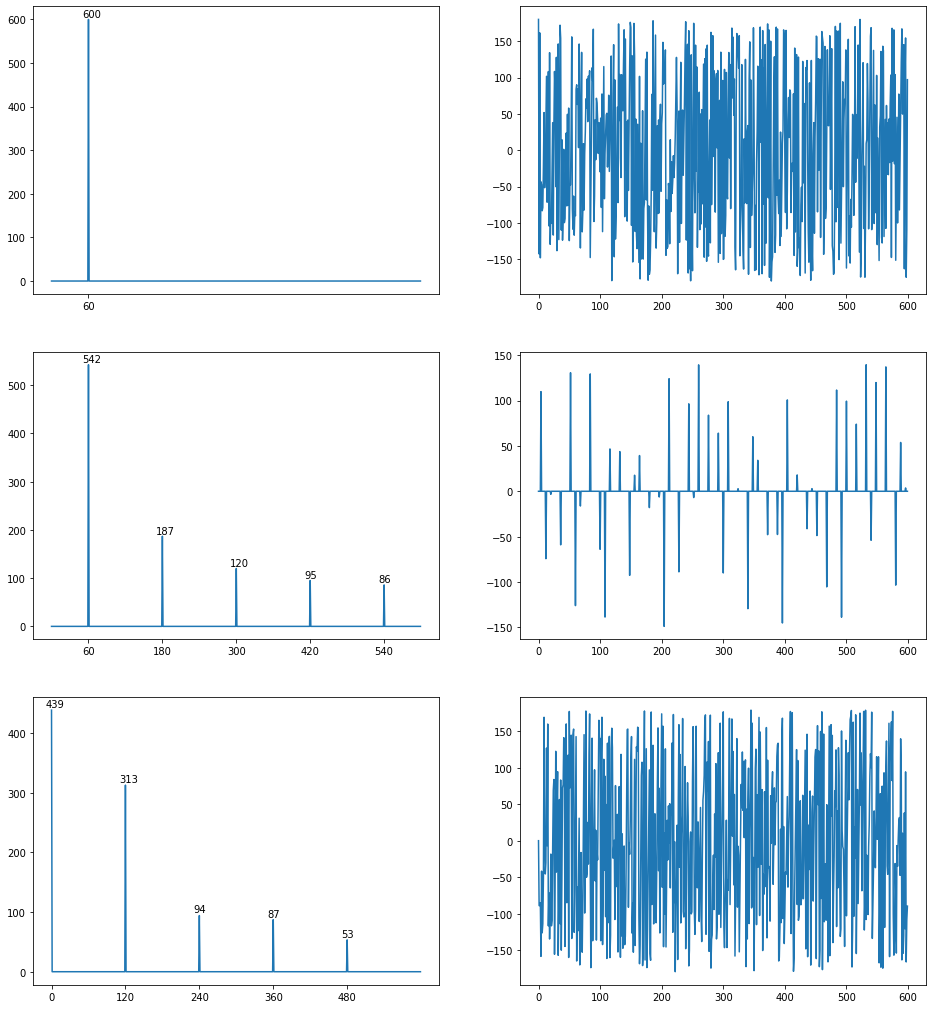

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
espectro_anotado(senoide_fft['abs'], senoide_fft['phase'], axs[0])
espectro_anotado(square_tir_fft['abs'], square_tir_fft['phase'], axs[1])
espectro_anotado(ret_tir_fft['abs'], ret_tir_fft['phase'], axs[2])
plt.show()

In [24]:
sos = signal.butter(8, [30, 90], 'bandpass', fs = fs, output = 'sos')
ret_half_filtered = signal.sosfilt(sos, ret_half)
ret_half_filtered_fft = fft(ret_half_filtered)

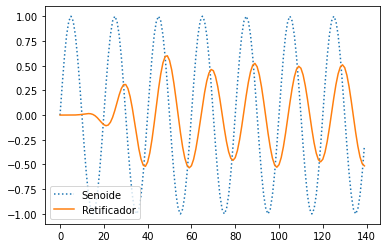

In [35]:
plt.plot(senoide[:7*N], linestyle=':', label='Senoide')
plt.plot(ret_half_filtered[:7*N], label='Retificador')
plt.legend()

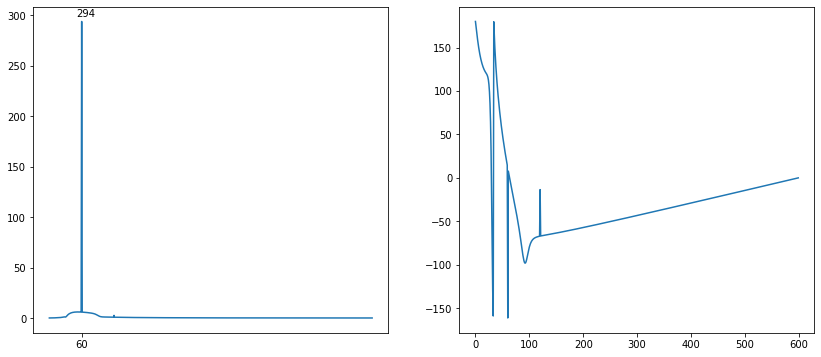

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
espectro_anotado(ret_half_filtered_fft['abs'], ret_half_filtered_fft['phase'], ax, thr=10)
plt.show()

TypeError: espectro_anotado() missing 1 required positional argument: 'axs'

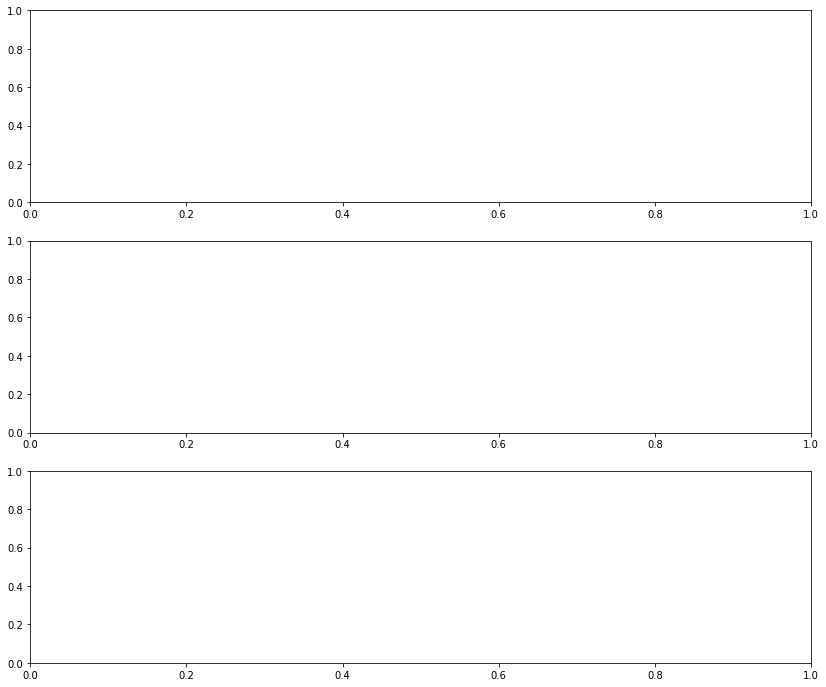

In [28]:
# isso aqui foi so pra conferir se o resultado da primeira questao batia
# bate, mas é preciso fazer uma convolução periódica e eu não achei nenhum método muito direto
# essa conta aqui foi mais empirismo que qualquer coisa, mas parece que bateu pelo menos em ordem de grandeza


# Espectro a partir da propriedade (convolucao dos espectros individuais)
conv = np.convolve(senoide_fft['abs'], square_half_fft['abs'], mode = 'full')/1200
fig, axs = plt.subplots(3, 1, figsize=(14, 12))
conv1 = conv[:1200]
conv2 = np.append(conv, [0])[1200:]
espectro_anotado(conv1, axs[0])
espectro_anotado(conv2, axs[1])

espectro = np.abs(conv1 - conv2)
espectro_anotado(espectro, axs[2])
plt.show()